## K-Means Algorithmus initialisieren

In [6]:
# Importieren der KMeans-Klasse aus der scikit-learn Bibliothek
from sklearn.cluster import KMeans

# Erstellen einer KMeans-Instanz mit spezifischen Parametern:
# - n_clusters: Anzahl der Cluster, die erstellt werden sollen (in diesem Fall 3)
# - random_state: Ein Seed für die Zufallsgenerierung, um reproduzierbare Ergebnisse zu gewährleisten
# - n_init: Anzahl der Versuche mit unterschiedlichen zufälligen Zentroiden
km = KMeans(n_clusters=4, random_state=2, n_init=20)

# Ausgeben der Konfiguration des KMeans-Objekts zur Überprüfung der Einstellungen
print("KMeans-Objektkonfiguration:\n", km)


KMeans-Objektkonfiguration:
 KMeans(n_clusters=4, n_init=20, random_state=2)


## Daten zu Cluster zuordnen

In [7]:
# Anwenden des KMeans-Algorithmus auf den Datensatz:
# 1. Der Algorithmus bestimmt die Clusterzentren basierend auf den Daten.
# 2. Jeder Datenpunkt im Datensatz wird einem dieser Zentren (Cluster) zugeordnet.
y_predicted = km.fit_predict(df[['alter_t', 'nettoeinkommen_eur_t']])

# Ausgeben des Arrays, das die Cluster-Zuweisungen für jeden Datenpunkt enthält.
print("Cluster-Zuweisungen für jeden Datenpunkt:", y_predicted)

Cluster-Zuweisungen für jeden Datenpunkt: [1 1 3 0 3 2 2 3 2 2 2 1 2 3 3 3 1 2 0 0 0 1 2 3 3 0 0 3 2 2 2 1 0 1 3 0 2
 3 1 3 3 2 0 1 3 3 2 2 2 2 0 1 3 2 0 3 1 1 1 2 3 1 0 2 1 0 3 3 2 3 2 2 2 2
 2 2 2 2 0 2]


## Array mit Cluster und Datensatz verknüpfen

In [8]:
# Neue Spalte 'cluster' zum DataFrame hinzufügen, die die Cluster-Zuweisungen für jeden Datenpunkt enthält.
df['cluster'] = y_predicted

# Ausgeben der ersten fünf Zeilen des DataFrames
print("Erste fünf Zeilen des aktualisierten Datensatzes:\n", df.head())

Erste fünf Zeilen des aktualisierten Datensatzes:
     name  alter  nettoeinkommen_eur  nettoeinkommen_eur_t   alter_t  cluster
0  Felix     77                7573              0.875062  1.455549        1
1   Amir     77                6864              0.568885  1.455549        1
2  Anton     75                3048             -1.079033  1.343584        3
3   Sara     22                2854             -1.162811 -1.623497        0
4    Lio     67                4872             -0.291349  0.895723        3


## Cluster in scatterplot visualisieren (inkl. Clusterzentren)

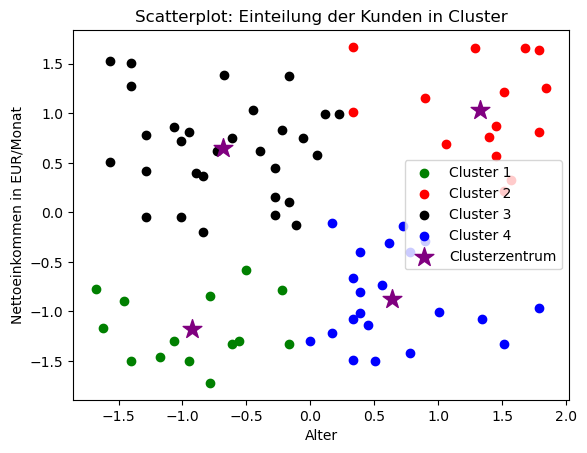

In [9]:
# Erstellen separater DataFrames für jedes Cluster
df_cluster1 = df[df.cluster == 0]
df_cluster2 = df[df.cluster == 1]
df_cluster3 = df[df.cluster == 2]
df_cluster4 = df[df.cluster == 3]

# Visualisieren der Datenpunkte jedes Clusters in einem Scatterplot
# Jedes Cluster wird in einer anderen Farbe dargestellt
plt.scatter(df_cluster1['alter_t'], df_cluster1['nettoeinkommen_eur_t'], color='green', label='Cluster 1')
plt.scatter(df_cluster2['alter_t'], df_cluster2['nettoeinkommen_eur_t'], color='red', label='Cluster 2')
plt.scatter(df_cluster3['alter_t'], df_cluster3['nettoeinkommen_eur_t'], color='black', label='Cluster 3')
plt.scatter(df_cluster4['alter_t'], df_cluster4['nettoeinkommen_eur_t'], color='blue', label='Cluster 4')

# Erhalten der Koordinaten der Clusterzentren
cluster_centers = km.cluster_centers_

# Hervorheben der Clusterzentren im Scatterplot
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='purple', marker='*', s=200, label='Clusterzentrum')

# Hinzufügen von Achsenbeschriftungen
plt.xlabel('Alter')
plt.ylabel('Nettoeinkommen in EUR/Monat')

# Setzen eines Titels
plt.title('Scatterplot: Einteilung der Kunden in Cluster')

# Hinzufügen einer Legende
plt.legend()

# Anzeigen des Scatterplots
plt.show()